### Zadanie 3

Celem zadania 3 jest policzenie całki 
\begin{equation}
    \int_{0}^{1} \frac{4}{1 + x^2} \, dx, 
\end{equation}
która jest przybliżeniem liczby $\pi$, za pomocą standardowej metody Monte Carlo i następnie porówanie jej skuteczności z jedną z metod redukcji wariancji.

### Metoda Monte Carlo
Metoda Monte carlo to numeryczna metoda rozwiązywania problemów, które ciężko rozwiązać analitycznie.

W tym zadaniu, procedura rozpoczyna się od wygenerowania N losowych próbek $x_i$ z rozkładu jednostajnego na odcinku [0,1], następnie dla każdej wygenerowanej próbki $x_i$ obliczamy wartość funkcji $f(x_i)$. Na koniec liczymy średnią z obliczonych wartości.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def monte_carlo(N: int) -> float:
    '''
    Metoda Monte Carlo do szacowania wartości pi.

    Parametry:
    N: liczba generowanych zmiennych losowych

    Zwraca:
    Średnia wartość szacowanego pi.
    '''
    C=np.zeros(N)
    U = np.random.uniform(0,1,N)
    for i in range(N):
        C[i] = 4 / (1 + U[i]**2)
    return np.mean(C)

In [10]:
print(monte_carlo(1000))

3.13422189686816


### Metoda odbić lustrzanych
W standardowej metodzie Monte Carlo wyniki mogą mieć wysoką wariancję, co oznacza niestabilność. Metoda odbić lustrzanych jest jedną z metod redukcji wariancji metody Monte Carlo, ktora pozwala na uzyskanie bardziej stabilnych wyników.

Schemat zaczyna się tak samo jak w standardowej metodzie Monte Carlo. Generujemy N losowych próbek $x_i$ z rozkładu jednostajnego na odcinku [0,1]. Następnie dla każdej wygenerowanej próbki $x_i$ obliczamy wartość funkcji $f(x_i)$ oraz $f(1-x_i)$. Obliczamy średnią z tych dwóch wartości, aby uzyskać dokładniejszą wartość funkcji dla każdej próbki. Na koniec liczymy średnią z poprawionych wartości, co daje nam oszacowanie wartości całki.

In [11]:
def monte_carlo_antithetic(N: int) -> float:
    '''
    Metoda Monte Carlo z wykorzystaniem techniki zmiennych przeciwstawnych do szacowania wartości pi.

    Parametry:
    N: liczba generowanych zmiennych losowych

    Zwraca:
    Średnia wartość szacowanego pi.
    '''
    U = np.random.uniform(0, 1, N)
    C = np.zeros(N)
    for i in range(N):
        f_U = 4 / (1 + U[i]**2)
        f_1_minus_U = 4 / (1 + (1 - U[i])**2)
        C[i] = (f_U + f_1_minus_U) / 2
    
    return np.mean(C)

In [12]:
print(monte_carlo_antithetic(1000))

3.144134321116955


### Analiza błędu

In [13]:
def blad(N: int, M: int) -> tuple[float, float]:
    '''
    Funkcja oblicza błędy bezwzględne metody Monte Carlo i metody Monte Carlo z redukcją wariancji.

    Parametry:
    N: liczba generowanych zmiennych losowych w jednej próbie
    M: liczba prób

    Zwraca:
    Krotka zawierająca błędy bezwzględne dla obu metod.
    '''
    mc_results = np.zeros(M)
    mc_anti_results = np.zeros(M)
    for i in range(M):
        mc_results[i] = monte_carlo(N)
        mc_anti_results[i] = monte_carlo_antithetic(N)
    mc_error = np.abs(np.mean(mc_results) - np.pi)
    mc_anti_error = np.abs(np.mean(mc_anti_results) - np.pi)
    return mc_error, mc_anti_error

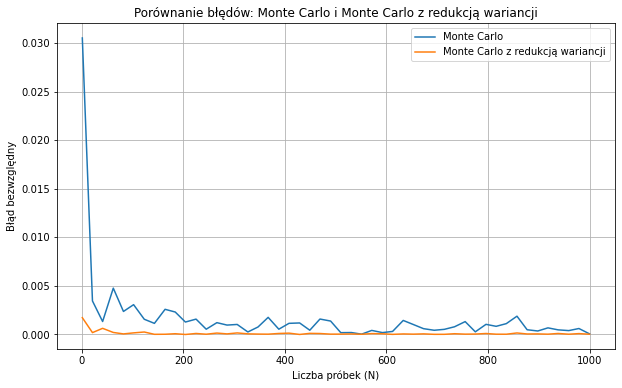

In [14]:
M = 1000
N_values = np.linspace(1, 1000, 50, dtype=int)

monte_carlo_errors = []
monte_carlo_antithetic_errors = []


for n in N_values:
    mc_error, mc_anti_error = blad(n, M)
    monte_carlo_errors.append(mc_error)
    monte_carlo_antithetic_errors.append(mc_anti_error)

plt.figure(figsize=(10, 6)) 
plt.plot(N_values, monte_carlo_errors, label='Monte Carlo')
plt.plot(N_values, monte_carlo_antithetic_errors, label='Monte Carlo z redukcją wariancji')
plt.xlabel('Liczba próbek (N)')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.title('Porównanie błędów: Monte Carlo i Monte Carlo z redukcją wariancji')
plt.grid(True)
plt.show()